# 图15 有序条形图

有序条形图有效地传达了项目的排名顺序，这是基于计数或任何给定指标可视化项目的经典方法。

在有序条形图上方添加度量标准的值，用户可以从图表本身获取精确信息.

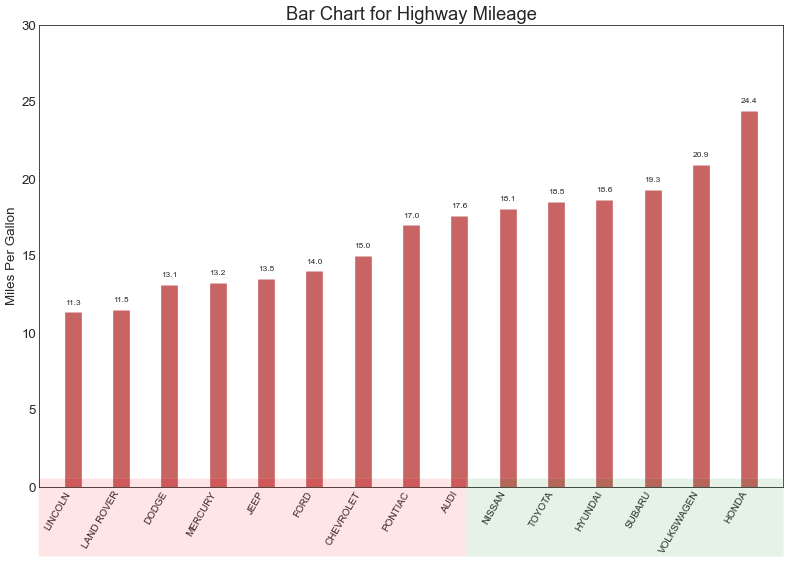

In [2]:
import matplotlib.pyplot as plt

from doc.Plot.require import *
import matplotlib.patches as patches

# Prepare Data
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
# df_raw = pd.read_csv("../data/mpg_ggplot2.csv")

df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)

# Draw plot
fig, ax = plt.subplots(figsize=(16, 10), facecolor='white', dpi=60)
ax.vlines(x=df.index, ymin=0, ymax=df.cty, color='firebrick', alpha=0.7, linewidth=20)

# Annotate Text
for i, cty in enumerate(df.cty):
    ax.text(i, cty + 0.5, round(cty, 1), horizontalalignment='center')

# Title, Label, Ticks and Ylim
ax.set_title('Bar Chart for Highway Mileage', fontdict={'size': 22})
ax.set(ylabel='Miles Per Gallon', ylim=(0, 30))
plt.xticks(df.index, df.manufacturer.str.upper(), rotation=60, horizontalalignment='right', fontsize=12)

# Add patches to color the X axis labels
p1 = patches.Rectangle((.57, -0.005), width=0.33, height=0.13, alpha=0.1, facecolor='green', transform=fig.transFigure)
p2 = patches.Rectangle((.124, -0.005), width=0.446, height=0.13, alpha=0.1, facecolor='red', transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)

plt.show()